# Hybrid Collaborative Filtering - Firdaus Adi Nugroho

User Based - Collaborative Filtering, doesn’t need anything else except users’ historical preference on a set of items. Because it’s based on historical data, the core assumption here is that the users who have agreed in the past tend to also agree in the future. In terms of user preference, it usually expressed by two categories. In this case, we are focusing on movie based on rating.<br><br>

Content Based - Collaborative Filtering, takes in a movie that a user currently likes as input. Then it analyzes the contents (storyline, genre, cast, director etc.) of the movie to find out other movies which have similar content. Then it ranks similar movies according to their similarity scores and recommends the most relevant movies to the user.<br><br>

Hybrid Collaborative Filtering combine between content based and user based

In [99]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

In [100]:
# load both of dataset from content based and user based

cb = pd.read_csv('film.csv')
cf = pd.read_csv('film_kelas.csv')

In [101]:
cb.head()

,ID,Movie,Genre,Rating,Duration,Country
0,1,Ada Apa dengan Cinta 2,Romance,4,100,Indonesia
1,2,Gundala,Action,4,120,Indonesia
2,3,Dilan 1991,Romance,3,90,Indonesia
3,4,Bumi Manusia,Romance,3,150,Indonesia
4,5,Dua Garis Biru,Romance,4,120,Indonesia


In [102]:
cf.head()

,Timestamp,Nama Anda,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
0,2019/09/17 10:18:21 AM GMT+7,Hania,3,5,4,4,4,0,0,0,0,0
1,2019/09/17 10:18:37 AM GMT+7,Topik Zulkarnain,0,0,0,0,0,5,5,0,4,2
2,2019/09/17 10:18:39 AM GMT+7,AhokTemanFirli,0,0,0,0,0,3,0,0,0,4
3,2019/09/17 10:18:42 AM GMT+7,franadek,4,4,4,5,3,5,4,5,4,4
4,2019/09/17 10:19:01 AM GMT+7,OM INDRA,3,0,2,0,5,5,0,1,5,5


In [103]:
#drop Time, because this collumn is not necessery


cf.drop(['Timestamp'],axis=1,inplace=True)

In [104]:
#drop ID, because this collumn is not necessery


cb.drop(['ID'],axis=1,inplace=True)
cb

,Movie,Genre,Rating,Duration,Country
0,Ada Apa dengan Cinta 2,Romance,4,100,Indonesia
1,Gundala,Action,4,120,Indonesia
2,Dilan 1991,Romance,3,90,Indonesia
3,Bumi Manusia,Romance,3,150,Indonesia
4,Dua Garis Biru,Romance,4,120,Indonesia
5,Avengers: End Game,Action,5,180,America
6,The Lion King,Drama,4,120,America
7,Aladdin,Romance,5,120,America
8,Spiderman: Far From Home,Action,5,110,America
9,Captain Marvel,Action,5,140,America


In [105]:
#define 'Movie' as a list

col = cb['Movie'].tolist()
col

['Ada Apa dengan Cinta 2',
 'Gundala',
 'Dilan 1991',
 'Bumi Manusia ',
 'Dua Garis Biru',
 'Avengers: End Game',
 'The Lion King',
 'Aladdin',
 'Spiderman: Far From Home',
 'Captain Marvel']

In [106]:
# set index for content based

cb.set_index(['Movie'],inplace=True)
cb.head()

,Genre,Rating,Duration,Country
Movie,,,,
Ada Apa dengan Cinta 2,Romance,4,100,Indonesia
Gundala,Action,4,120,Indonesia
Dilan 1991,Romance,3,90,Indonesia
Bumi Manusia,Romance,3,150,Indonesia
Dua Garis Biru,Romance,4,120,Indonesia


## Content Based
First thing, we do Content Based first to because the parameter not bounded by the user

In [107]:
# set index for user based

cf.set_index(['Nama Anda'],inplace=True)
cf.head()

,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
Nama Anda,,,,,,,,,,
Hania,3,5,4,4,4,0,0,0,0,0
Topik Zulkarnain,0,0,0,0,0,5,5,0,4,2
AhokTemanFirli,0,0,0,0,0,3,0,0,0,4
franadek,4,4,4,5,3,5,4,5,4,4
OM INDRA,3,0,2,0,5,5,0,1,5,5


In [108]:
from sklearn.preprocessing import LabelEncoder

cb['Country'] = LabelEncoder().fit_transform(cb['Country'])
cb['Genre'] = LabelEncoder().fit_transform(cb['Genre'])

Label Encoder is used for balancing the dataset. The Label Encoder changes Genre and Country from string to string. So we can easly build model from that columns

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit_transform(cb)
cb_scaler = pd.DataFrame(scaler)
cb_scaler.head()

,0,1,2,3
0,1.0,0.5,0.111111,1.0
1,0.0,0.5,0.333333,1.0
2,1.0,0.0,0.000000,1.0
3,1.0,0.0,0.666667,1.0
4,1.0,0.5,0.333333,1.0


We need doing MinMax Scaler to our dataset to generate all of dataset become the minimal value is 0 and the maximum value is 1. So we can do transform of corelation easily

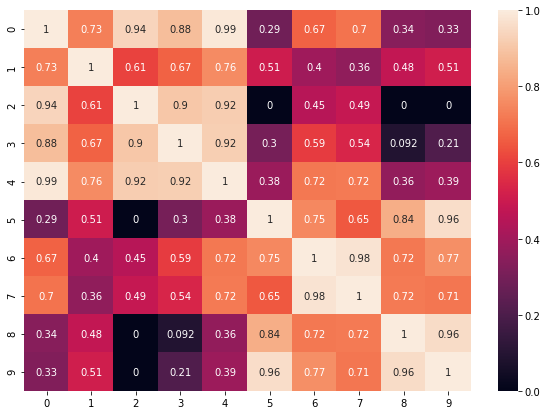

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
#datalab = pd.get_dummies(datamovie)
numerik =pd.DataFrame(cosine_similarity(cb_scaler,cb_scaler),columns=cb_scaler.index)
plt.figure(figsize=(10,7))
sns.heatmap(numerik, annot=True)

as we can see at the result above, this correlation heatmap show us the correlation between each collumn

## Build Model
<br>
- Cosine Similarity
We are using cosine similarity for our Content Based Filtering, Cosine similarity is a metric used to measure how similar the two items or documents are irrespective of their size. It measures the cosine of an angle between two vectors projected in multi-dimensional space. This allows us to measure the similarity of a document of any type. Due to a multi-dimensional array, any number of variables (which are treated as dimensions) can be used, which in turn supports large sized documents

Mathematically, the cosine of the angle of between two vectors is derived from the dot product of the two vectors divided by the product of the two vectors’ magnitude.
<img src="cos_similarity.jpg" alt="Smiley face" height="500" width="500"/>

Since we are finding the cosine of two vectors the output will always range from -1 to 1, where -1 shows that two items are dissimilar and 1 shows that two items are completely similar. We will now see how we can use the Cosine Similarity measure to determine how similar the movies are.

In [111]:
from sklearn.metrics.pairwise import cosine_similarity
data_cosine = cosine_similarity(cb_scaler)
#data_cosine = pd.DataFrame(data_cosine,columns = datamovie2.columns, index = datamovie2.columns)
data_cosine

array([[1.        , 0.73344031, 0.94023306, 0.88197179, 0.9895449 ,
        0.28729343, 0.66935359, 0.70331407, 0.34053164, 0.32646488],
       [0.73344031, 1.        , 0.60609153, 0.67005939, 0.7592566 ,
        0.50507627, 0.39594419, 0.36051044, 0.48034601, 0.51339396],
       [0.94023306, 0.60609153, 1.        , 0.90453403, 0.92035799,
        0.        , 0.45226702, 0.48666426, 0.        , 0.        ],
       [0.88197179, 0.67005939, 0.90453403, 1.        , 0.92499458,
        0.30151134, 0.59090909, 0.53802759, 0.09249946, 0.20707884],
       [0.9895449 , 0.7592566 , 0.92035799, 0.92499458, 1.        ,
        0.38348249, 0.7168708 , 0.72162527, 0.36470588, 0.38979775],
       [0.28729343, 0.50507627, 0.        , 0.30151134, 0.38348249,
        1.        , 0.75377836, 0.64888568, 0.84366149, 0.96152395],
       [0.66935359, 0.39594419, 0.45226702, 0.59090909, 0.7168708 ,
        0.75377836, 1.        , 0.97823198, 0.7168708 , 0.76619171],
       [0.70331407, 0.36051044, 0.4866642

In [112]:
cb_movie = pd.DataFrame(data_cosine,columns = col,index = col)
cb_movie

,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
Ada Apa dengan Cinta 2,1.000000,0.733440,0.940233,0.881972,0.989545,0.287293,0.669354,0.703314,0.340532,0.326465
Gundala,0.733440,1.000000,0.606092,0.670059,0.759257,0.505076,0.395944,0.360510,0.480346,0.513394
Dilan 1991,0.940233,0.606092,1.000000,0.904534,0.920358,0.000000,0.452267,0.486664,0.000000,0.000000
Bumi Manusia,0.881972,0.670059,0.904534,1.000000,0.924995,0.301511,0.590909,0.538028,0.092499,0.207079
Dua Garis Biru,0.989545,0.759257,0.920358,0.924995,1.000000,0.383482,0.716871,0.721625,0.364706,0.389798
Avengers: End Game,0.287293,0.505076,0.000000,0.301511,0.383482,1.000000,0.753778,0.648886,0.843661,0.961524
The Lion King,0.669354,0.395944,0.452267,0.590909,0.716871,0.753778,1.000000,0.978232,0.716871,0.766192
Aladdin,0.703314,0.360510,0.486664,0.538028,0.721625,0.648886,0.978232,1.000000,0.721625,0.713050
Spiderman: Far From Home,0.340532,0.480346,0.000000,0.092499,0.364706,0.843661,0.716871,0.721625,1.000000,0.958692
Captain Marvel,0.326465,0.513394,0.000000,0.207079,0.389798,0.961524,0.766192,0.713050,0.958692,1.000000


Result of cosine similarity and turn to dataframe

In [113]:
cb_cf_transpose = cf.transpose()
cb_cf_transpose

Nama Anda,Hania,Topik Zulkarnain,AhokTemanFirli,franadek,OM INDRA,Mulya,Genjeh,faizah,Dpv,Putrisqiana,...,bunga,Jawaharal,Febi ganteng gak ada obat,Star,Indra Junior,Indra 1991 SM,Damar Teman Firli,jul,luck,Maria O.
Ada Apa dengan Cinta 2,3,0,0,4,3,0,5,3,5,4,...,0,2,4,4,4,0,5,0,3,0
Gundala,5,0,0,4,0,0,4,0,4,3,...,4,4,3,4,0,5,0,3,0,0
Dilan 1991,4,0,0,4,2,0,3,5,4,2,...,4,3,4,0,0,0,0,0,0,0
Bumi Manusia,4,0,0,5,0,0,0,5,0,4,...,0,0,0,0,0,0,0,0,0,0
Dua Garis Biru,4,0,0,3,5,0,0,4,0,3,...,0,5,0,0,4,0,0,3,0,0
Avengers: End Game,0,5,3,5,5,4,5,5,5,5,...,5,5,5,5,5,0,5,3,4,0
The Lion King,0,5,0,4,0,2,0,0,0,0,...,5,4,0,5,5,0,0,3,0,5
Aladdin,0,0,0,5,1,5,5,0,0,0,...,5,5,5,5,5,0,0,3,0,4
Spiderman: Far From Home,0,4,0,4,5,4,4,0,5,4,...,5,5,5,0,5,0,5,3,0,0
Captain Marvel,0,2,4,4,5,3,4,0,5,3,...,5,4,4,5,5,0,0,3,2,0


In [114]:
mov_watched = cb_cf_transpose.loc[cb_cf_transpose['Febi ganteng gak ada obat'] != 0]
mov_watched= mov_watched.reset_index()
mov_watched = mov_watched['index'].tolist()
mov_watched

['Ada Apa dengan Cinta 2',
 'Gundala',
 'Dilan 1991',
 'Avengers: End Game',
 'Aladdin',
 'Spiderman: Far From Home',
 'Captain Marvel']

We want to see which film that Febi ganteng gak ada obat has already watched

In [115]:
mov_unwatched = cb_cf_transpose.loc[cb_cf_transpose['Febi ganteng gak ada obat'] == 0]
mov_unwatched= mov_unwatched.reset_index()
mov_unwatched = mov_unwatched['index'].tolist()
mov_unwatched

['Bumi Manusia ', 'Dua Garis Biru', 'The Lion King']

In [116]:
movie_simi = cb_movie.drop(mov_unwatched, axis=1)
movie_simi = cb_movie.loc[mov_unwatched]
movie_simi

,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
Bumi Manusia,0.881972,0.670059,0.904534,1.000000,0.924995,0.301511,0.590909,0.538028,0.092499,0.207079
Dua Garis Biru,0.989545,0.759257,0.920358,0.924995,1.000000,0.383482,0.716871,0.721625,0.364706,0.389798
The Lion King,0.669354,0.395944,0.452267,0.590909,0.716871,0.753778,1.000000,0.978232,0.716871,0.766192


This result is which film that Febi ganteng gak ada obat hasnt watched yet

In [117]:
movie_simi['mean'] = movie_simi.mean(axis=1)
movie_simi

,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel,mean
Bumi Manusia,0.881972,0.670059,0.904534,1.000000,0.924995,0.301511,0.590909,0.538028,0.092499,0.207079,0.611159
Dua Garis Biru,0.989545,0.759257,0.920358,0.924995,1.000000,0.383482,0.716871,0.721625,0.364706,0.389798,0.717064
The Lion King,0.669354,0.395944,0.452267,0.590909,0.716871,0.753778,1.000000,0.978232,0.716871,0.766192,0.704042


Here the correlation between Febi ganteng gak ada obat's already watched and unwatched

In [154]:
cb_result = movie_simi[['mean']]
cb_result = cb_result.reset_index().sort_values(by='mean',ascending=False)
cb_result = cb_result.head(3)
cb_result

,index,mean
1,Dua Garis Biru,0.717064
2,The Lion King,0.704042
0,Bumi Manusia,0.611159


The result of recomendation febi ganteng gak ada obat to watch next movie is The Lion King. From all of watched film, it would be count by mean so we can see, the biggest mean value is The Lion King

# User Based Collaborative Filtering
In this section, we will consider the user rating

In [119]:
cb_cf_cor = cb_cf_transpose.corr(method='pearson')
cb_cf_cor

Nama Anda,Hania,Topik Zulkarnain,AhokTemanFirli,franadek,OM INDRA,Mulya,Genjeh,faizah,Dpv,Putrisqiana,...,bunga,Jawaharal,Febi ganteng gak ada obat,Star,Indra Junior,Indra 1991 SM,Damar Teman Firli,jul,luck,Maria O.
Nama Anda,,,,,,,,,,,,,,,,,,,,,
Hania,1.000000,-0.741027,-0.481843,-0.325300,-0.339788,-0.905908,-0.309524,0.451097,-0.105381,0.213478,...,-0.667458,-0.502906,-0.404762,-0.505830,-0.845447,0.487950,-0.319438,-0.532397,-0.303770,-0.484228
Topik Zulkarnain,-0.741027,1.000000,0.394996,0.142374,0.295226,0.567809,0.023157,-0.213100,0.209087,0.065255,...,0.588579,0.421870,0.115785,0.311580,0.588579,-0.253109,0.434959,0.497096,0.315142,0.277343
AhokTemanFirli,-0.481843,0.394996,1.000000,0.188092,0.550113,0.414680,0.344173,-0.012420,0.469181,0.326222,...,0.382716,0.231720,0.344173,0.469181,0.382716,-0.164581,0.138527,0.323230,0.668420,-0.244988
franadek,-0.325300,0.142374,0.188092,1.000000,-0.324967,0.464140,0.325300,0.117393,-0.043193,0.041667,...,0.258378,-0.257663,0.325300,0.316752,-0.045596,-0.111111,0.145479,-0.145479,0.253629,0.202150
OM INDRA,-0.339788,0.295226,0.550113,-0.324967,1.000000,0.316025,0.294483,0.138971,0.505311,0.528071,...,0.046568,0.472487,0.385093,-0.116302,0.554587,-0.402340,0.526787,0.283654,0.500948,-0.496529
Mulya,-0.905908,0.567809,0.414680,0.464140,0.316025,1.000000,0.478118,-0.444977,0.102466,-0.174052,...,0.719540,0.611245,0.578774,0.436596,0.719540,-0.309426,0.292597,0.607701,0.206900,0.392362
Genjeh,-0.309524,0.023157,0.344173,0.325300,0.294483,0.478118,1.000000,-0.236289,0.716592,0.213478,...,0.422724,0.314316,0.952381,0.463677,0.244735,0.162650,0.532397,0.106479,0.540035,-0.188311
faizah,0.451097,-0.213100,-0.012420,0.117393,0.138971,-0.444977,-0.236289,1.000000,-0.030424,0.478745,...,-0.554002,-0.436704,-0.193327,-0.467765,-0.393422,-0.322832,0.134491,-0.614816,0.280149,-0.480554
Dpv,-0.105381,0.209087,0.469181,-0.043193,0.505311,0.102466,0.716592,-0.030424,1.000000,0.583111,...,0.287540,0.122423,0.716592,0.141791,0.051206,0.172774,0.622088,-0.056553,0.591575,-0.600095


The Pearson correlation coefficient is used to measure the strength of a linear association between two variables, where the value r = 1 means a perfect positive correlation and the value r = -1 means a perfect negataive correlation. So, for example, you could use this test to find out whether people's height and weight are correlated (they will be - the taller people are, the heavier they're likely to be).

Requirements for Pearson's correlation coefficient
- Scale of measurement should be interval or ratio<br>
- Variables should be approximately normally distributed<br>
- The association should be linear<br>
- There should be no outliers in the data<br><br>
Equation
<img src="pearson.png" alt="Smiley face" height="500" width="500"/>


In [120]:
cb_cf_cor['Febi ganteng gak ada obat'].sort_values(ascending=False)

Nama Anda
Febi ganteng gak ada obat    1.000000
Genjeh                       0.952381
Rima                         0.882735
Dpv                          0.716592
Nonton_Saat_Diskon           0.657713
Mulya                        0.578774
bunga                        0.533967
Damar Teman Firli            0.532397
luck                         0.438779
OM INDRA                     0.385093
Jawaharal                    0.377179
AhokTemanFirli               0.344173
franadek                     0.325300
Star                         0.295067
ANI                          0.267041
Indra Junior                 0.266983
Romantika                    0.243975
Putrisqiana                  0.182981
Topik Zulkarnain             0.115785
jul                          0.106479
Indra 1991 SM                0.000000
Maria O.                    -0.188311
faizah                      -0.193327
Hania                       -0.404762
Name: Febi ganteng gak ada obat, dtype: float64

In [121]:
cb_cf_corr = cb_cf_cor[['Febi ganteng gak ada obat']].loc[(cb_cf_cor['Febi ganteng gak ada obat']>0) & (cb_cf_cor['Febi ganteng gak ada obat']<1)]
cb_cf_corr

Nama Anda,Febi ganteng gak ada obat
Nama Anda,
Topik Zulkarnain,0.115785
AhokTemanFirli,0.344173
franadek,0.325300
OM INDRA,0.385093
Mulya,0.578774
Genjeh,0.952381
Dpv,0.716592
Putrisqiana,0.182981
Nonton_Saat_Diskon,0.657713


In this case, we spesificly choose "Febi ganteng gak ada obat" rows. We can see the result, Genjeh is the closest of correlation to Febi ganteng gak ada obat

In [122]:
cb_cf_corr_fil = cb_cf_corr.iloc[5:10].sort_values(by='Febi ganteng gak ada obat', ascending=False)
cb_cf_corr_fil

Nama Anda,Febi ganteng gak ada obat
Nama Anda,
Genjeh,0.952381
Dpv,0.716592
Nonton_Saat_Diskon,0.657713
Romantika,0.243975
Putrisqiana,0.182981


this result above, we select just only 5 best value of correlation from Febi ganteng gak ada obat

In [123]:
user_cor_rat = cf
user_cor_rat = user_cor_rat.transpose()
user_cor_rat = user_cor_rat.loc[user_cor_rat['Febi ganteng gak ada obat'] == 0]
user_cor_rat = user_cor_rat.transpose()
user_cor_rat['Febi ganteng gak ada obat'] = cb_cf_corr_fil
user_cor_rat = user_cor_rat.dropna()
user_cor_rat = user_cor_rat.drop(['Febi ganteng gak ada obat'], axis=1)
user_cor_rat

,Bumi Manusia,Dua Garis Biru,The Lion King
Nama Anda,,,
Genjeh,0,0,0
Dpv,0,0,0
Putrisqiana,4,3,0
Nonton_Saat_Diskon,0,0,5
Romantika,0,0,0


The result above, we select the value 0. 'Genjeh' hasn't watched Bumi Manusia, Dua Garis Biru, and The Lion King Movie. Genje has a lot of value 0. So 0 means 'Genji' hasn't watched yet. So it would compare to Febi ganteng gak ada obat. 

In [124]:
sim_rat = (user_cor_rat.transpose()).dot(cb_cf_corr_fil)
rating = []
l = len(sim_rat)
for i in range(l):
    a = sim_rat.iloc[i,0] / cb_cf_corr_fil['Febi ganteng gak ada obat'].sum()
    rating.append(a)
    #print(rating)

#rating
apa = {'rating': rating}
result1 = pd.DataFrame(apa)
result1

,rating
0,0.265803
1,0.199352
2,1.194260


In this result from calculate of pearson correlation and value of rating. For example: Putrisqiana has voted to Bumi Manusia is 4, Dua Garis Biru is 3, and she hasn't watched The Lion King. and Putri has Correlation is about 0.182981<br>
So the correlation value would be multiple of value rating. Ex:<br>
Bumi Manusia: 4 * 0.182981. so the result would be 0.265803 <br>
It would be used for predict movie recommendation based on rating of Febi ganteng gak ada obat

In [125]:
col_user = user_cor_rat.transpose()
col_user = col_user.reset_index()
col_user = col_user[['index']]
col_user.columns = ['movie']
col_user

,movie
0,Bumi Manusia
1,Dua Garis Biru
2,The Lion King


Doing reset index to return movie value to collumn and than doing join to merge between movie and rating column

In [126]:
cf_result = col_user.join(result1,how='outer')
cf_result = cf_result.sort_values(by='rating',ascending=False)
cf_result

,movie,rating
2,The Lion King,1.194260
0,Bumi Manusia,0.265803
1,Dua Garis Biru,0.199352


Output of Collaborative Filltering is how the recommendation would set based on rating. In this case, we pick 'Febi ganteng gak ada obat' would watch The Lion King first because of other data correlation rating

# Hybrid Collaborative Filtering
what we are doing here? we are goint to combine between User Based and Content Based Collaborative Filtering, so the output will be intersection between User Based and Content Based Collaborative Filtering

In [143]:
col_user = user_cor_rat.transpose()
col_user = col_user.reset_index()
col_user = col_user[['index']]
col_user.columns = ['Movie']

In [148]:
cb_result1 = cb_result1.rename(columns={'index': 'movie'})
cb_result1

,movie,mean
1,Dua Garis Biru,0.717064
2,The Lion King,0.704042
0,Bumi Manusia,0.611159


In [147]:
cb_result1

,index,mean
1,Dua Garis Biru,0.717064
2,The Lion King,0.704042
0,Bumi Manusia,0.611159


we need to standarize the collumn first

In [149]:
cb_cf_result = pd.merge(cb_result1,cf_result,how='left',on='movie')
cb_cf_result = cb_cf_result[cb_cf_result.rating !=0]

In this syntax, we merge between result of content based and user based collaborative filtering

In [150]:
cb_cf_result.sort_values(by='rating',ascending=False)

,movie,mean,rating
1,The Lion King,0.704042,1.194260
2,Bumi Manusia,0.611159,0.265803
0,Dua Garis Biru,0.717064,0.199352


In [153]:
cb_cf_result['mean'] = cb_cf_result.mean(axis=1)
cb_cf_result.sort_values(by='rating',ascending=False)

,movie,mean,rating
1,The Lion King,1.071705,1.194260
2,Bumi Manusia,0.352142,0.265803
0,Dua Garis Biru,0.328780,0.199352


# Result & Conclusion
In this case, we have been doing Hybrid Collaborative Filtering by combining the User Based and Content Based Collaborative Filtering which is has own algorithm. User Based using Pearson Correlation and Content Based using Cosine Similarity which the goal is to give recommendation of movie but different approach. If we combining, the result will be goes to The Lion King Film that has the biggest rating value(user based, and the mean value(content based). The score is 1.071705 value mean and 1.194260 value rating.